In [31]:
import pandas as pd

file_path = "01_Data.csv"

df = pd.read_csv(file_path)

df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51256 entries, 0 to 51255
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          51256 non-null  int64  
 1   Member_ID      51256 non-null  int64  
 2   Sales_Type     51256 non-null  object 
 3   Contract_Type  51256 non-null  object 
 4   Channel        51256 non-null  object 
 5   Datetime       51256 non-null  object 
 6   Term           51256 non-null  int64  
 7   Payment_Type   51256 non-null  object 
 8   Product_Type   51256 non-null  object 
 9   Amount_Month   51256 non-null  int64  
 10  Customer_Type  51254 non-null  object 
 11  Age            44290 non-null  float64
 12  Address1       51254 non-null  object 
 13  Address2       51254 non-null  object 
 14  State          51256 non-null  object 
 15  Overdue_count  51256 non-null  int64  
 16  Overdue_Type   51256 non-null  object 
 17  Gender         51256 non-null  object 
 18  Credit

(None,
               Index     Member_ID          Term   Amount_Month           Age  \
 count  51256.000000  5.125600e+04  51256.000000   51256.000000  44290.000000   
 mean   25659.846964  6.266418e+07     55.677462   94018.697830     50.024227   
 std    14810.188277  1.216198e+07     11.945344   15289.782634     10.984905   
 min        1.000000  2.568798e+07     12.000000   54603.000000     25.000000   
 25%    12833.750000  6.643158e+07     60.000000   81900.000000     42.000000   
 50%    25664.500000  6.676580e+07     60.000000   96900.000000     49.000000   
 75%    38488.250000  6.678162e+07     60.000000   98400.000000     57.000000   
 max    51302.000000  6.696986e+07     60.000000  215700.000000    102.000000   
 
        Overdue_count   Credit_Rank  
 count   51256.000000  42485.000000  
 mean        0.156372      3.426880  
 std         1.100081      2.212661  
 min         0.000000      0.000000  
 25%         0.000000      1.000000  
 50%         0.000000      3.00000

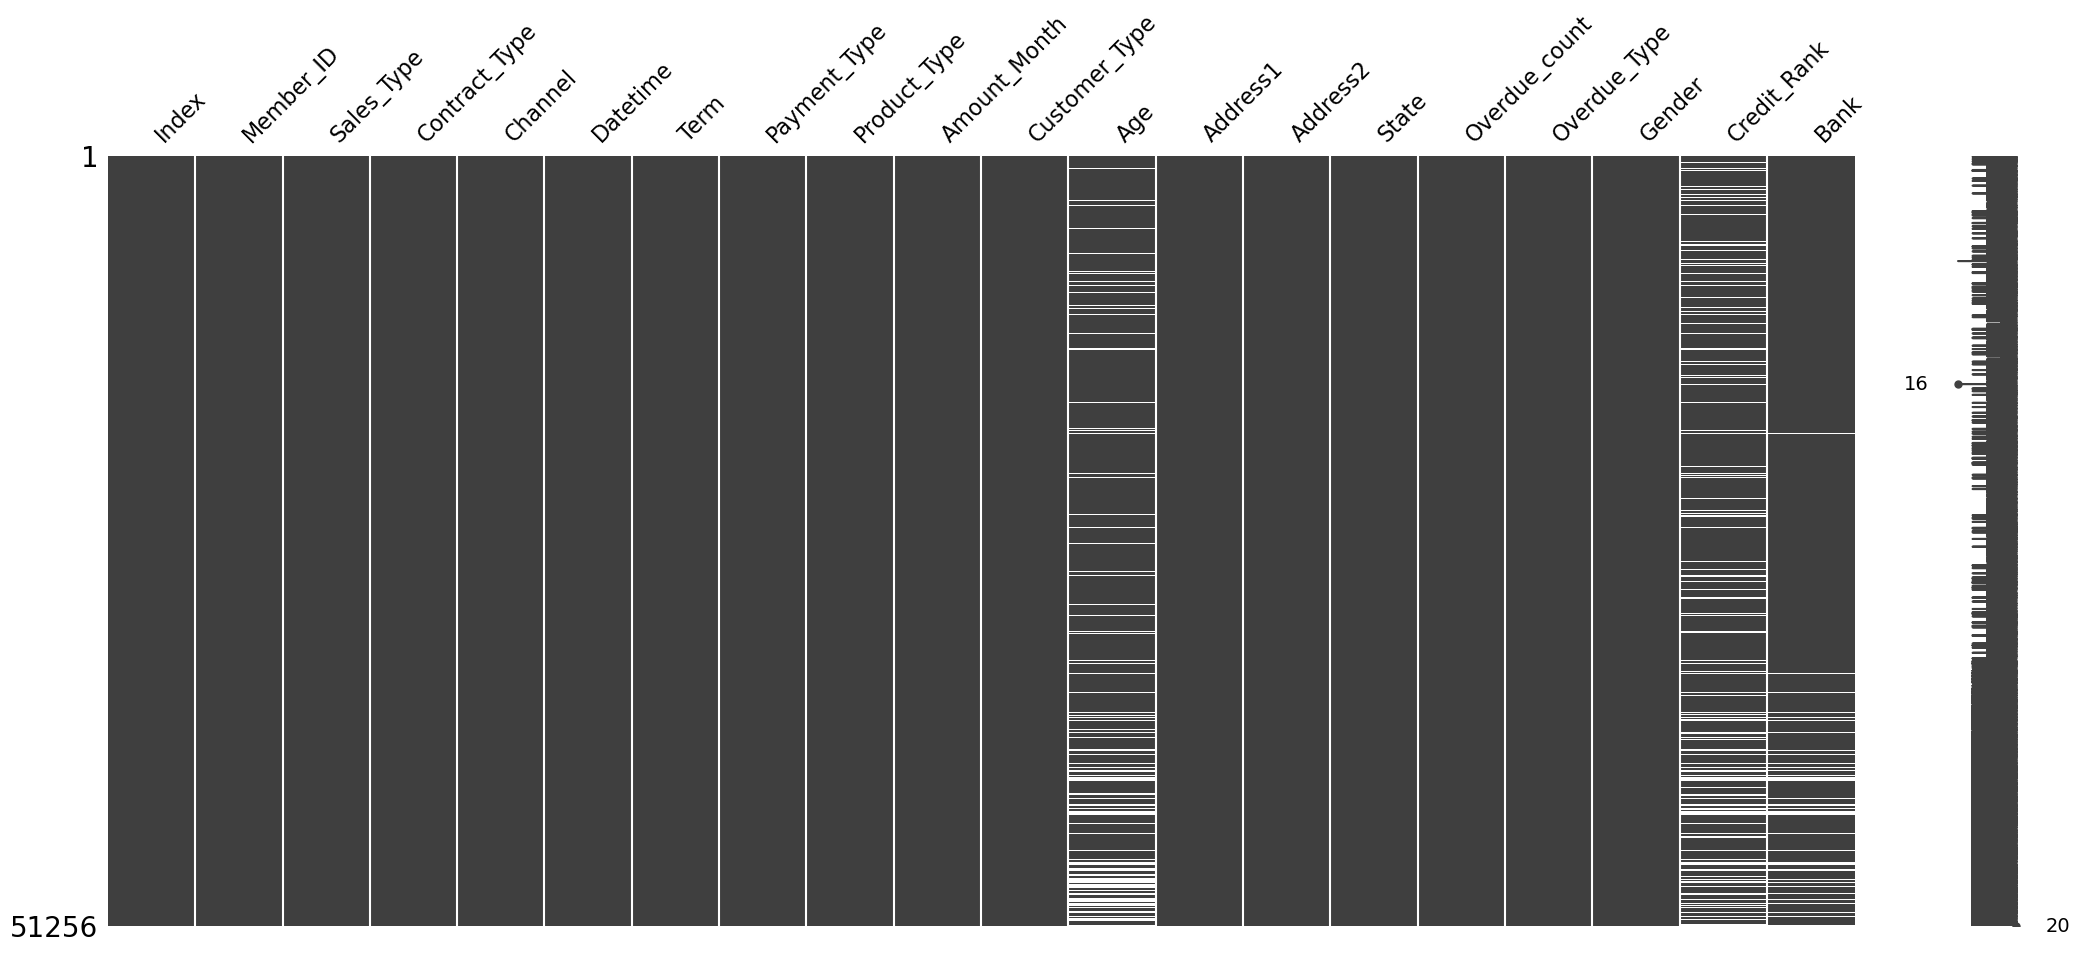

In [67]:
import missingno as msno
import matplotlib.pyplot as plt

# 데이터 시각화
msno.matrix(df)

# 파일 저장 (PNG, JPG, PDF 등 다양한 형식 가능)
plt.savefig("missing_data_matrix0.png", dpi=300, bbox_inches="tight")

# plt.show()를 사용하여 화면에도 출력 가능
plt.show()


In [41]:
df_cleaned = df.set_index("Index")

In [43]:
df_cleaned = df_cleaned.drop(['Member_ID','Address1'], axis = 1)

In [45]:
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Datetime'])

In [47]:
df_cleaned.isnull().sum()

Sales_Type          0
Contract_Type       0
Channel             0
Datetime            0
Term                0
Payment_Type        0
Product_Type        0
Amount_Month        0
Customer_Type       2
Age              6966
Address2            2
State               0
Overdue_count       0
Overdue_Type        0
Gender              0
Credit_Rank      8771
Bank             2758
dtype: int64

In [49]:
df_cleaned = df_cleaned.dropna(subset=['Customer_Type', 'Address2'])
df_cleaned['Bank'] = df_cleaned['Bank'].fillna('Unknown') 
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].mean())

df_cleaned

,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
Index,,,,,,,,,,,,,,,,,
1,렌탈,일반계약,영업방판,2022-05-05,60,CMS,DES-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,9.0,새마을금고
2,렌탈,교체계약,영업방판,2023-02-19,60,카드이체,DES-1,102900,개인,39.0,경기도,계약확정,0,없음,남자,2.0,현대카드
3,렌탈,일반계약,홈쇼핑/방송,2022-02-27,60,CMS,DES-1,96900,개인,48.0,경기도,계약확정,0,없음,여자,8.0,우리은행
4,멤버십,멤버십3유형,재계약,2022-05-12,12,CMS,DES-1,66900,개인,39.0,경기도,계약확정,0,없음,남자,5.0,농협회원조합
6,렌탈,프로모션계약,영업방판,2022-07-28,60,CMS,DES-3A,90900,개인,53.0,경상도,계약확정,0,없음,여자,5.0,농협중앙회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51298,렌탈,프로모션계약,대형마트A,2022-02-28,60,CMS,DES-3A,96900,개인,47.0,경기도,계약확정,0,없음,남자,NaN,기업은행
51299,렌탈,일반계약,대형마트A,2022-03-31,60,CMS,DES-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,8.0,새마을금고
51300,렌탈,프로모션계약,영업방판,2022-03-31,39,카드이체,ERA,120900,개인,65.0,서울특별시,계약확정,0,없음,여자,1.0,롯데카드


In [51]:
df_cleaned.loc[df_cleaned['Overdue_Type'] == '있음', 'Credit_Rank'] = df_cleaned['Credit_Rank'].fillna(7)
df_cleaned.loc[df_cleaned['Overdue_Type'] != '있음', 'Credit_Rank'] = df_cleaned['Credit_Rank'].fillna(5)

df_cleaned

,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
Index,,,,,,,,,,,,,,,,,
1,렌탈,일반계약,영업방판,2022-05-05,60,CMS,DES-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,9.0,새마을금고
2,렌탈,교체계약,영업방판,2023-02-19,60,카드이체,DES-1,102900,개인,39.0,경기도,계약확정,0,없음,남자,2.0,현대카드
3,렌탈,일반계약,홈쇼핑/방송,2022-02-27,60,CMS,DES-1,96900,개인,48.0,경기도,계약확정,0,없음,여자,8.0,우리은행
4,멤버십,멤버십3유형,재계약,2022-05-12,12,CMS,DES-1,66900,개인,39.0,경기도,계약확정,0,없음,남자,5.0,농협회원조합
6,렌탈,프로모션계약,영업방판,2022-07-28,60,CMS,DES-3A,90900,개인,53.0,경상도,계약확정,0,없음,여자,5.0,농협중앙회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51298,렌탈,프로모션계약,대형마트A,2022-02-28,60,CMS,DES-3A,96900,개인,47.0,경기도,계약확정,0,없음,남자,5.0,기업은행
51299,렌탈,일반계약,대형마트A,2022-03-31,60,CMS,DES-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,8.0,새마을금고
51300,렌탈,프로모션계약,영업방판,2022-03-31,39,카드이체,ERA,120900,개인,65.0,서울특별시,계약확정,0,없음,여자,1.0,롯데카드


In [53]:
df_cleaned.isnull().sum()

Sales_Type       0
Contract_Type    0
Channel          0
Datetime         0
Term             0
Payment_Type     0
Product_Type     0
Amount_Month     0
Customer_Type    0
Age              0
Address2         0
State            0
Overdue_count    0
Overdue_Type     0
Gender           0
Credit_Rank      0
Bank             0
dtype: int64

In [55]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51254 entries, 1 to 51302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales_Type     51254 non-null  object        
 1   Contract_Type  51254 non-null  object        
 2   Channel        51254 non-null  object        
 3   Datetime       51254 non-null  datetime64[ns]
 4   Term           51254 non-null  int64         
 5   Payment_Type   51254 non-null  object        
 6   Product_Type   51254 non-null  object        
 7   Amount_Month   51254 non-null  int64         
 8   Customer_Type  51254 non-null  object        
 9   Age            51254 non-null  float64       
 10  Address2       51254 non-null  object        
 11  State          51254 non-null  object        
 12  Overdue_count  51254 non-null  int64         
 13  Overdue_Type   51254 non-null  object        
 14  Gender         51254 non-null  object        
 15  Credit_Rank    51254 non

In [57]:
df_cleaned["Channel"] = df_cleaned["Channel"].replace({
    '대형마트A': '대형마트', '대형마트C': '대형마트', '대형마트H': '대형마트',
    '대형마트N': '대형마트', '대형마트E': '대형마트',
    '영업방판': '영업방판',
    '자체홈페이지': '홈쇼핑', '홈쇼핑/방송': '홈쇼핑', '홈쇼핑/인터넷': '홈쇼핑',
    '전단홍보': '전단홍보',
    '전문매장H': '전문매장', '전문매장Z': '전문매장',
    '직영유통사': '직영사', '직영계열사A': '직영사', '직영계열사B': '직영사',
    '재계약': '재계약'
})
df_cleaned

,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
Index,,,,,,,,,,,,,,,,,
1,렌탈,일반계약,영업방판,2022-05-05,60,CMS,DES-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,9.0,새마을금고
2,렌탈,교체계약,영업방판,2023-02-19,60,카드이체,DES-1,102900,개인,39.0,경기도,계약확정,0,없음,남자,2.0,현대카드
3,렌탈,일반계약,홈쇼핑,2022-02-27,60,CMS,DES-1,96900,개인,48.0,경기도,계약확정,0,없음,여자,8.0,우리은행
4,멤버십,멤버십3유형,재계약,2022-05-12,12,CMS,DES-1,66900,개인,39.0,경기도,계약확정,0,없음,남자,5.0,농협회원조합
6,렌탈,프로모션계약,영업방판,2022-07-28,60,CMS,DES-3A,90900,개인,53.0,경상도,계약확정,0,없음,여자,5.0,농협중앙회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51298,렌탈,프로모션계약,대형마트,2022-02-28,60,CMS,DES-3A,96900,개인,47.0,경기도,계약확정,0,없음,남자,5.0,기업은행
51299,렌탈,일반계약,대형마트,2022-03-31,60,CMS,DES-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,8.0,새마을금고
51300,렌탈,프로모션계약,영업방판,2022-03-31,39,카드이체,ERA,120900,개인,65.0,서울특별시,계약확정,0,없음,여자,1.0,롯데카드


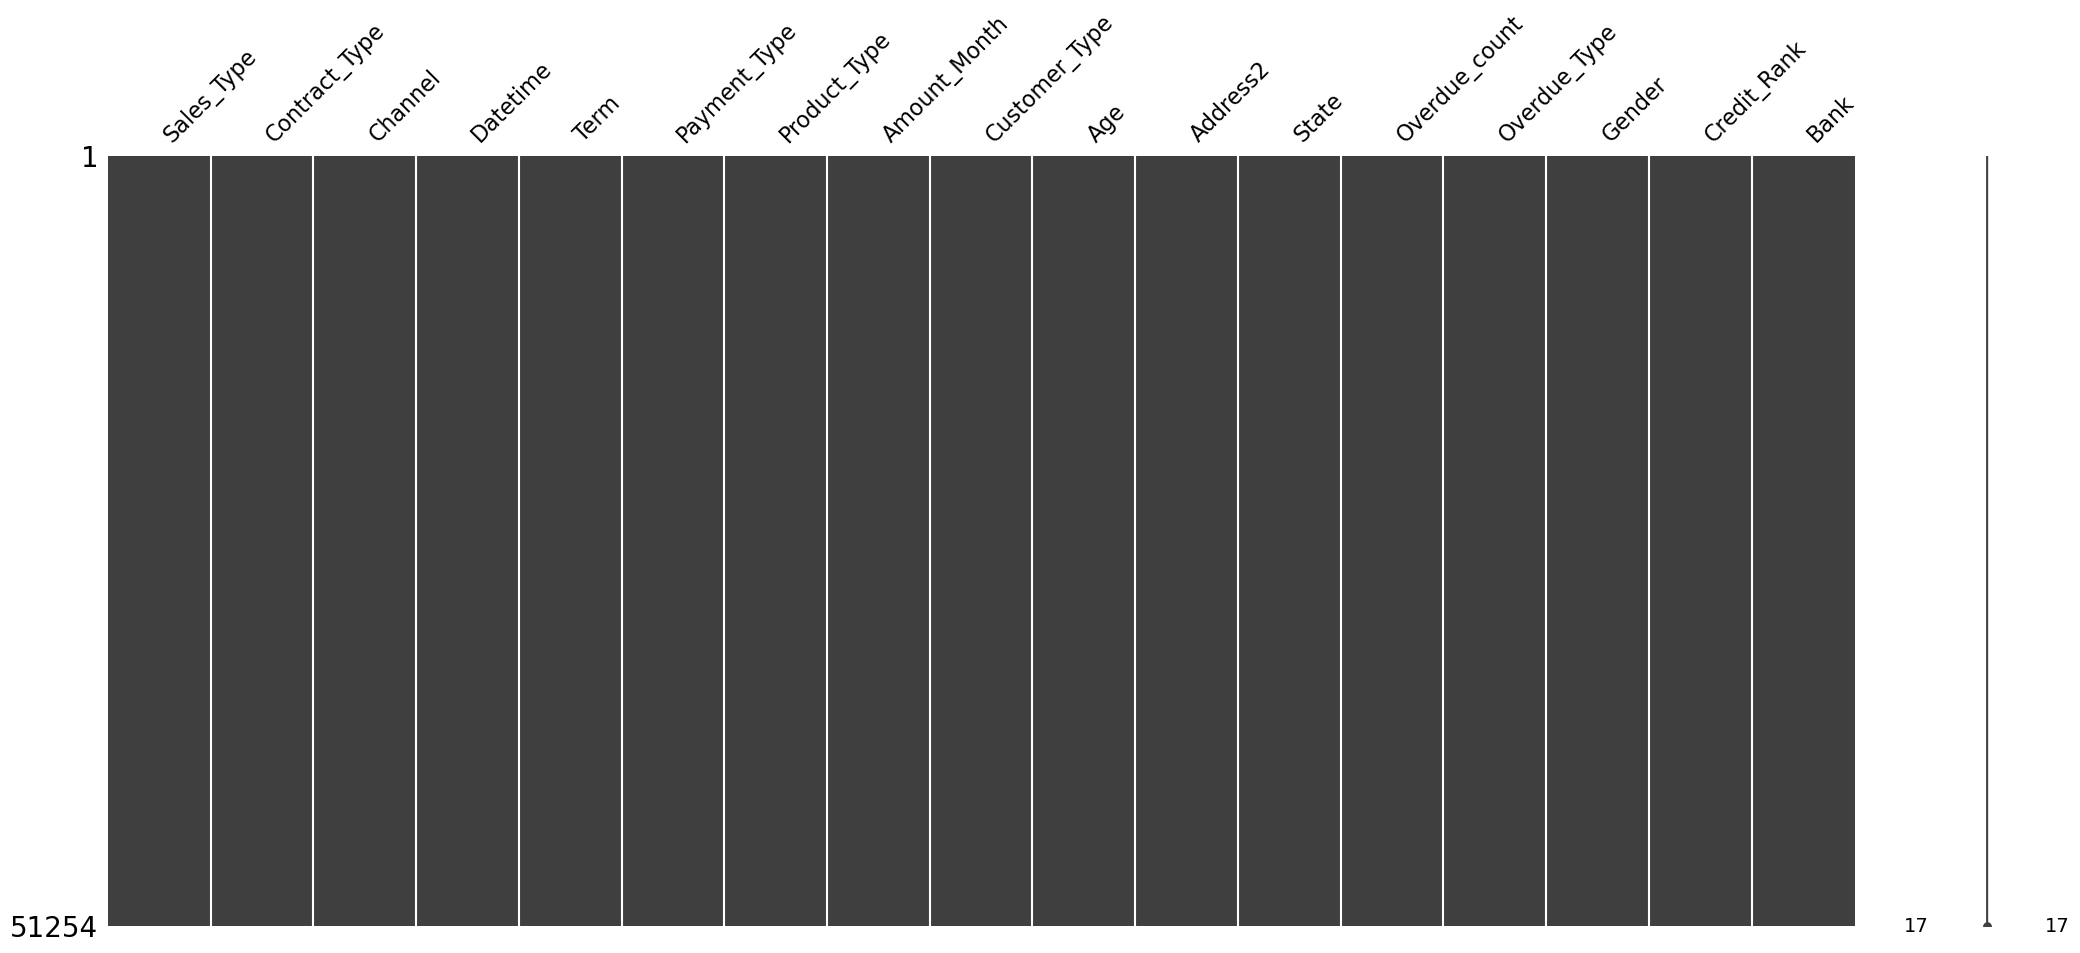

In [65]:
import missingno as msno
import matplotlib.pyplot as plt

# 데이터 시각화
msno.matrix(df_cleaned)

# 파일 저장 (PNG, JPG, PDF 등 다양한 형식 가능)
plt.savefig("missing_data_matrix.png", dpi=300, bbox_inches="tight")

# plt.show()를 사용하여 화면에도 출력 가능
plt.show()


In [69]:
df_cleaned

,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
Index,,,,,,,,,,,,,,,,,
1,렌탈,일반계약,영업방판,2022-05-05,60,CMS,DES-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,9.0,새마을금고
2,렌탈,교체계약,영업방판,2023-02-19,60,카드이체,DES-1,102900,개인,39.0,경기도,계약확정,0,없음,남자,2.0,현대카드
3,렌탈,일반계약,홈쇼핑,2022-02-27,60,CMS,DES-1,96900,개인,48.0,경기도,계약확정,0,없음,여자,8.0,우리은행
4,멤버십,멤버십3유형,재계약,2022-05-12,12,CMS,DES-1,66900,개인,39.0,경기도,계약확정,0,없음,남자,5.0,농협회원조합
6,렌탈,프로모션계약,영업방판,2022-07-28,60,CMS,DES-3A,90900,개인,53.0,경상도,계약확정,0,없음,여자,5.0,농협중앙회
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51298,렌탈,프로모션계약,대형마트,2022-02-28,60,CMS,DES-3A,96900,개인,47.0,경기도,계약확정,0,없음,남자,5.0,기업은행
51299,렌탈,일반계약,대형마트,2022-03-31,60,CMS,DES-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,8.0,새마을금고
51300,렌탈,프로모션계약,영업방판,2022-03-31,39,카드이체,ERA,120900,개인,65.0,서울특별시,계약확정,0,없음,여자,1.0,롯데카드


In [71]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51254 entries, 1 to 51302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales_Type     51254 non-null  object        
 1   Contract_Type  51254 non-null  object        
 2   Channel        51254 non-null  object        
 3   Datetime       51254 non-null  datetime64[ns]
 4   Term           51254 non-null  int64         
 5   Payment_Type   51254 non-null  object        
 6   Product_Type   51254 non-null  object        
 7   Amount_Month   51254 non-null  int64         
 8   Customer_Type  51254 non-null  object        
 9   Age            51254 non-null  float64       
 10  Address2       51254 non-null  object        
 11  State          51254 non-null  object        
 12  Overdue_count  51254 non-null  int64         
 13  Overdue_Type   51254 non-null  object        
 14  Gender         51254 non-null  object        
 15  Credit_Rank    51254 non

In [79]:
import pandas as pd

# 2023년 8월까지만 고려
cutoff_date = pd.Timestamp("2023-08-31")

def calculate_sales(df):
    total_sales_2022 = 0
    total_sales_2023 = 0

    for _, row in df.iterrows():
        start_date = row["Datetime"]
        term_months = row["Term"]
        monthly_amount = row["Amount_Month"]

        # 계약 종료일 계산
        end_date = start_date + pd.DateOffset(months=term_months - 1)

        # 2022년 매출 계산 (2022년 1월~12월)
        if start_date.year <= 2022 <= end_date.year:
            months_in_2022 = max(0, 12 - start_date.month + 1)
            total_sales_2022 += months_in_2022 * monthly_amount

        # 2023년 매출 계산 (1월~8월까지만 반영)
        if start_date.year <= 2023 <= end_date.year:
            start_month_2023 = max(1, start_date.month)  # 1월 이전 계약이면 1월부터 시작
            end_month_2023 = min(8, end_date.month)  # 8월 이후 계약 종료일이면 8월까지만 반영
            
            if start_month_2023 <= 8:  # 2023년 8월 이전까지만 반영
                months_in_2023 = end_month_2023 - start_month_2023 + 1
                total_sales_2023 += months_in_2023 * monthly_amount

    return total_sales_2022, total_sales_2023

# 매출 계산 실행
sales_2022, sales_2023 = calculate_sales(df_cleaned)

# 최종 출력
total_sales = sales_2022 + sales_2023
print(f"2022년 총 매출액: {sales_2022}")
print(f"2023년(1월~8월) 총 매출액: {sales_2023}")
print(f"2022년과 2023년(8월까지) 총 매출액 합계: {total_sales}")


2022년 총 매출액: 28988951373
2023년(1월~8월) 총 매출액: 4875835632
2022년과 2023년(8월까지) 총 매출액 합계: 33864787005


Timestamp('2023-08-07 00:00:00')